In [37]:
import torch
import matplotlib.pyplot as plt

In [38]:
array = torch.tensor([[1,2,3,4],[2,3,4,5]])
print(array)
print(array.shape)
print(array.ndim)

tensor([[1, 2, 3, 4],
        [2, 3, 4, 5]])
torch.Size([2, 4])
2


tensor([[  0.,   0.,   0.,   0.],
        [120., 120., 120., 120.],
        [  0.,   0., 255.,   0.],
        [  0.,   0.,   0.,   0.]])


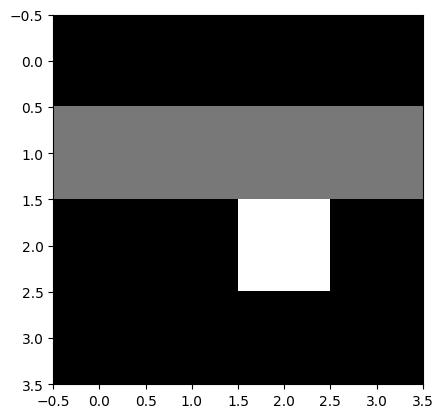

In [39]:
array = torch.zeros(4,4)
array[2,2]=255
array[1,:]=120
print(array)
plt.imshow(array,cmap='gray')

In [40]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(30,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,5)
)

print(model)

Sequential(
  (0): Linear(in_features=30, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=5, bias=True)
)


In [41]:
import tensorflow as tf
import keras
model = tf.keras.Sequential(
    
)

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64,activation='relu',input_shape = (20,)),
    Dense(32,activation='relu'),
    Dense(5,activation = 'softmax')
])

input_data = torch.randn(10,20)

output = model(input_data)
print(output)
print(model.summary())

tf.Tensor(
[[0.11996822 0.17967671 0.14854985 0.20592743 0.3458778 ]
 [0.21979435 0.14270625 0.10151278 0.11512557 0.42086104]
 [0.13441361 0.09909039 0.1397445  0.12749322 0.4992583 ]
 [0.07873977 0.05000602 0.16179608 0.14552455 0.56393355]
 [0.10930783 0.09465639 0.14521773 0.12714036 0.5236777 ]
 [0.03046107 0.01016865 0.10622767 0.13441496 0.71872765]
 [0.12978227 0.14259602 0.12579675 0.20032102 0.4015039 ]
 [0.09475647 0.03258194 0.09318264 0.18297158 0.5965074 ]
 [0.10328862 0.08820403 0.1313552  0.1230524  0.55409974]
 [0.10856701 0.16603649 0.11726189 0.16798662 0.440148  ]], shape=(10, 5), dtype=float32)


/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/cv_img/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,589 (14.02 KB)

 Trainable params: 3,589 (14.02 KB)

 Non-trainable params: 0 (0.00 B)

None


In [97]:
import torch
import torch.nn as nn
import torch.optim as optim

In [98]:
x = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0],[6.0]])
y = torch.tensor([[1.0],[4.0],[9.0],[16.0],[25.0],[36.0]])

In [99]:
class PredictModule(nn.Module):
    def __init__(self):
        super(PredictModule,self).__init__()
        self.layer1 = nn.Linear(1,50)
        self.layer2 = nn.Linear(50,92)
        self.layer3 = nn.Linear(92,200)
        self.layer4 = nn.Linear(200,40)
        self.layer5 = nn.Linear(40,1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
    def forward(self,x):
        x1 = self.relu(self.layer1(x))
        # x1 = self.dropout(x1)
        x2 = self.relu(self.layer2(x1))
        x3 = self.relu(self.layer3(x2))
        x4 = self.relu(self.layer4(x3))
        x5 = self.layer5(x4)
        return x5
model = PredictModule()
print(model)


PredictModule(
  (layer1): Linear(in_features=1, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=92, bias=True)
  (layer3): Linear(in_features=92, out_features=200, bias=True)
  (layer4): Linear(in_features=200, out_features=40, bias=True)
  (layer5): Linear(in_features=40, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)


In [100]:
criterion = nn.MSELoss()
optimiser = optim.Adam(model.parameters(),lr=0.01)
num_epoch = 100

def train_model(x,y):
    for epoch in range(num_epoch):
        pred = model(x)
        loss = criterion(pred,y)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        print(f'Epoch ---> {epoch} : Loss ---> {loss.item(): .4f}')

In [101]:
train_model(x,y)

Epoch ---> 0 : Loss --->  382.7585
Epoch ---> 1 : Loss --->  356.7609
Epoch ---> 2 : Loss --->  293.8392
Epoch ---> 3 : Loss --->  176.8290
Epoch ---> 4 : Loss --->  47.1873
Epoch ---> 5 : Loss --->  167.8373
Epoch ---> 6 : Loss --->  96.5999
Epoch ---> 7 : Loss --->  32.6937
Epoch ---> 8 : Loss --->  46.8934
Epoch ---> 9 : Loss --->  76.3903
Epoch ---> 10 : Loss --->  90.1418
Epoch ---> 11 : Loss --->  84.6426
Epoch ---> 12 : Loss --->  64.6442
Epoch ---> 13 : Loss --->  39.8229
Epoch ---> 14 : Loss --->  25.7816
Epoch ---> 15 : Loss --->  35.5489
Epoch ---> 16 : Loss --->  54.5240
Epoch ---> 17 : Loss --->  50.8530
Epoch ---> 18 : Loss --->  31.2962
Epoch ---> 19 : Loss --->  21.1463
Epoch ---> 20 : Loss --->  24.9108
Epoch ---> 21 : Loss --->  32.6442
Epoch ---> 22 : Loss --->  36.0120
Epoch ---> 23 : Loss --->  32.5171
Epoch ---> 24 : Loss --->  24.3037
Epoch ---> 25 : Loss --->  16.7126
Epoch ---> 26 : Loss --->  15.2350
Epoch ---> 27 : Loss --->  19.6647
Epoch ---> 28 : Loss --->

In [102]:
print(model(x))

tensor([[ 1.0620],
        [ 3.9845],
        [ 8.9740],
        [15.9685],
        [24.9324],
        [35.9549]], grad_fn=<AddmmBackward0>)
